<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF285 - Computación Científica </h1>
    <h2> Tarea 1 - Código Base</h2>
    <h2> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> 2024-1</h2>
</center>

# Consultas

* Enviar a: **tareas.inf285@gmail.com**
* Se recibirán consultas en **tres** bloques. i) El primer bloque será desde las 12:15 hrs. hasta las 17:00 hrs. del día jueves, donde todas las preguntas recibidas dentro de este bloque se responderán con seguridad a partir de las 17:01 hrs. del día jueves. (ii) El segundo bloque de consultas será desde las 17:01 hrs. del día jueves hasta las 08:15 hrs. del día viernes, donde las preguntas recibidas dentro de este bloque horario se responderán con seguridad a partir de las 08:16 hrs. del día viernes. (iii) El tercer, y último bloque, de consultas será desde las 08:16 hrs. hasta las 14:30 hrs. del día viernes, donde las preguntas recibidas dentro de este bloque horario se responderán con seguridad a partir de las 14:31 hrs. del día viernes.

# Librerías (no utilizar liberías adicionales)

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Contexto

Consideremos la siguiente función:

$$
f(x) = 2\,\exp(x)\,\sin(2\,x)^2
$$

A continuación se muestra una gráfica de la función:

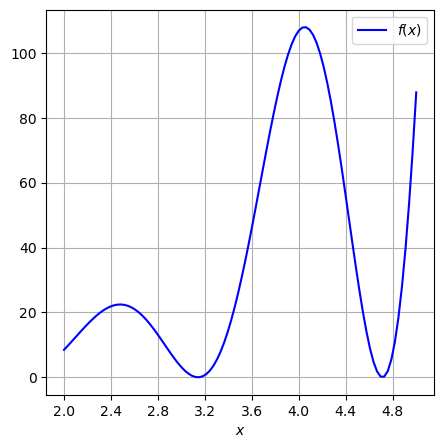

In [71]:
f = lambda x: 2.*np.exp(x)*np.power(np.sin(2.*x),2)

plt.figure(figsize=(5,5))
x = np.linspace(2.,5.,100)
y = f(x)
plt.plot(x,y,'b-', label='$f(x)$', markersize=10)
plt.grid(True)
plt.xlabel(r'$x$')
plt.xticks(np.arange(2.,5.,.4))
plt.legend(loc='best')
plt.show()

Podemos notar que en el intervalo $[2.8,4.8]$ la función tiene dos raíces. Analicemos primero el intervalo $[2.8,3.6]$, en este caso, si aplicamos el método de la Bisección tenemos que $f(2.8)\,f(3.6) > 0$, por lo tanto, el método falla y no inicia una búsqueda de la raíz. Lo mismo sucede en el intervalo $[4.4,4.8]$. Lo podemos verificar, ejecutando el método de la Bisección en los intervalos indicados.

# Funciones Entregadas (No debe modificarlas)

In [72]:
def bisect(f, a, b, tol=1e-12):
    """
    input:
    f   : (callable) function to evaluate.
    a   : (double)   left value of interval.
    b   : (double)   right value of interval.
    tol : (double)   tolerance.
    
    output:
    xc  : (double)   root approximation of f. 
    """
    fa = f(a)
    fb = f(b)
    i = 0
    if np.sign(fa*fb) > 0:
        return None
    
    while((b-a)/2 > tol):
        c = (a+b)/2
        fc = f(c)
        if fc == 0:
            break
        elif np.sign(fa*fc) < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
        i += 1
    xc = (a + b)/2
    return xc

Ejecutamos el método de la Bisección en el intervalo $[2.8,3.6]$:

In [73]:
bisect(f,2.8,3.6) == None

True

Ejecutamos el método de la Bisección en el intervalo $[4.4,4.8]$:

In [74]:
bisect(f,4.4,4.8) == None

True

# Búsqueda de puntos críticos!

Una solución para el problema anterior, es abordarlo como una búsqueda de puntos críticos, es decir, encontrar los puntos donde la derivada de la función es igual a $0$. Podemos notar, que en el intervalo $[2.8,4.8]$ existen dos puntos críticos, los cuales son a su vez las raíces de $f(x)$!

# Pregunta 1.

Utilice el método de la Bisección para encontrar un punto crítico de una función $f(x)$ en un intervalo $[a,b]$. Para abordar este problema utilice la siguiente aproximación para la derivada de $f(x)$ en el punto $x$ denominada *diferencia finita central*:

$$
f'(x) \approx \dfrac{f(x + h) - f(x - h)}{2h}
$$

donde $h$ es el paso de la aproximación.

1.1 (10 puntos) Construya la aproximación de la derivada para una función $f(x)$.

In [75]:
def fp(f,x,h):
    """
    input:
    f   : (callable) function to evaluate.
    x   : (double)   point where the derivative is approximated.
    h   : (double)   approximation step.
    
    output:
    yp  : (double)   derivative approximation of f at x. 
    """
    #acá va su codigo
    #--------------------------------
    
    yp = (f(x + h) - f(x-h))/(2*h)

    #--------------------------------
    return yp

1.2 (25 puntos) Construya un algoritmo que utilice el método de la Bisección, y permita encontrar un punto crítico $x_c$ para una función $f(x)$ en el intervalo $[a,b]$ con un paso de aproximación $h$. En caso de que el punto no sea encontrado, debe retornar **None**.

*Hint: your implementation must call the bisection method provided.*

In [76]:
def critical_point(f, a, b, h, tol_cp=1e-12):
    """
    input:
    f      : (callable) function to evaluate.
    a      : (double)   left value of interval.
    b      : (double)   right value of interval.
    h      : (double)   approximation step.
    tol_cp : (double)   tolerance for the critical point approximation.
    
    output:
    xc  : (double)   critical point approximation of f in the interval [a,b].
    """
    #acá va su codigo
    #--------------------------------
    
    # Defino la función f_derivate como una aproximación a la derivada de f'(x), utilizando un h fijo.
    f_derivate = lambda x: fp(f, x, h)

    # Por consecuente, encontrar el punto critico de una función f(x) es equivalente a encontrar la raiz de su derivada f'(x), o sea: f'(x) = 0.
    # Ya poseemos una aproximación de f'(x), por lo cual bastaria encontrar su raiz utilizando el método de la bisección:
    xc = bisect(f_derivate, a, b, tol_cp)
    #--------------------------------
    return xc

1.3 (5 puntos) Determine la raíz $r_1$ para la función $f(x) = 2\,\exp(x)\,\sin(2\,x)^2$ en el intervalo $[2.8,3.6]$ con $h = 10^{-6}$.

In [105]:
#acá va su codigo
#--------------------------------
a = 2.8
b = 3.6
h = 1e-6

critical_point(f, a, b, h)
#--------------------------------

3.1415926535897603

1.4 (5 puntos) Seleccione un valor para $h$ en función de la siguiente gráfica, que muestra la relación entre $h$ y el error relativo de la raíz $r_1$. Justifique su respuesta.

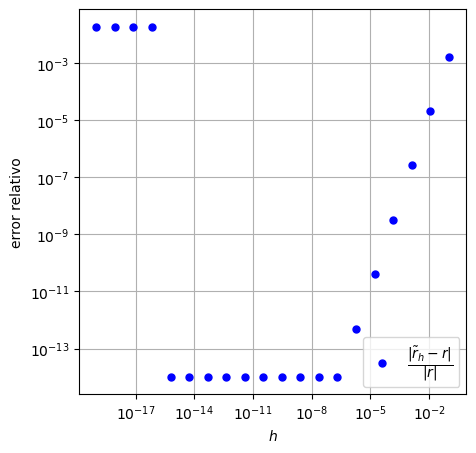

In [78]:
h = np.logspace(-19,-1,20)
cp = lambda h: critical_point(f,a,b,h)
cp_vec = np.vectorize(cp)
cp_arr = cp_vec(h)
error_rel = np.abs(cp_arr - np.pi)/np.pi

plt.figure(figsize=(5,5))
plt.loglog(h,error_rel,'b.', label=r'$\dfrac{|\tilde{r}_h - r|}{|r|}$', markersize=10)
plt.grid(True)
plt.xlabel(r'$h$')
plt.ylabel('error relativo')
plt.legend(loc='best')
plt.show()

Escriba su justificación de la elección de $h$:

**---------------------------------------------------------------------------------------------------------------------------**

**Respuesta:**

Analizando el grafico, podemos concluir que:

- A medida que $h$ se va acercando a $0$, o sea que $h$ es más pequeño, el error relativo va disminuyendo.
- En $10^{-15} \leq h \leq  10^{-6}$ el error se estabiliza.
- Cuando $h$ $\leq$ $10^{-16}$, se produce una perdida de importancia. Lo que significa que en la operación, el valor de $h$ es despreciable, por ende el error aumenta.


Considerando esos puntos, la elección de $h$ sería:

$h = 10^{-6}$

**---------------------------------------------------------------------------------------------------------------------------**

# Pregunta 2.

Sea la función $f_1(x) = \exp(x)\,((x - 2.5)^2 - 1.5)$. Podemos observar que la función en el intervalo $[0,4]$ tiene dos raíces $r_1$ y $r_2$ con multiplicidad $1$. 

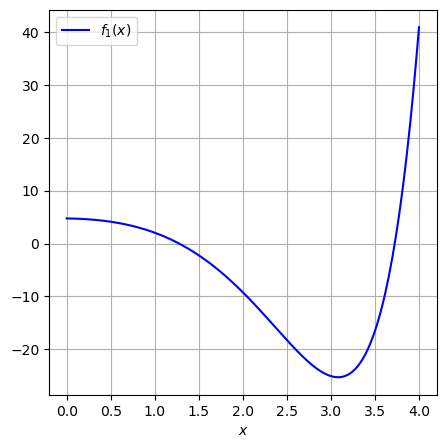

In [79]:
f1 = lambda x: np.exp(x)*(np.power(x - 2.5,2) - 1.5)

plt.figure(figsize=(5,5))
x = np.linspace(0.,4.,200)
y = f1(x)
plt.plot(x,y,'b-', label='$f_1(x)$', markersize=10)
plt.grid(True)
plt.xlabel(r'$x$')
plt.legend(loc='best')
plt.show()

2.1 (30 puntos) Considere que ahora usted dispone de una función $f(x)$ en un intervalo $[a,b]$, tal que existen dos raíces $r_1$ y $r_2$ con multiplicidad $1$ y solamente un punto crítico $x_c$ en $[a,b]$ tal que $f'(x_c) = 0$. Construya un algoritmo que permita encontrar ambas raíces basado en el método de la Bisección. En caso de que no sea posible encontrar las raíces, debe retornar **None** para $r_1$ y $r_2$.

*Hint: it would be very useful to use the algorithm implemented before, i.e. critical_point, within your code.*

In [80]:
def both_roots(f,a,b,h,tol=1e-12):
    """
    input:
    f   : (callable) function to evaluate.
    a   : (double)   left value of interval.
    b   : (double)   right value of interval.
    h   : (double)   approximation step.
    tol : (double)   tolerance.
    
    output:
    r1  : (double)   approximation of root r1.
    r2  : (double)   approximation of root r2.
    """
    #acá va su codigo
    #--------------------------------
    
    # Del enunciado sabemos que existen dos raíces (r1 y r2) y un solo punto crítico (xc) en el intervalo [a, b], por lo que  se debe cumplir:
    # f(a)*f(xc) < 0
    # f(xc)*f(b) < 0

    # Esto se debe a que en el punto crítico, la curva comienza a cambiar de dirección.
    # Por ende, el intervalo para buscar la primera raíz sería [a, xc] y el intervalo para buscar la segunda raíz sería [b, xc].

    # Calculamos el punto crítico.
    xc = critical_point(f, a, b, h)

    # La primera raíz se encuentra antes del punto crítico, es decir, en el intervalo [a, xc].
    r1 = bisect(f, a, xc, tol)

    # La segunda raíz se encuentra en el intervalo [xc, b].
    r2 = bisect(f, xc, b, tol)
            
    #--------------------------------
    return r1,r2

2.2 (5 puntos) Determine las raíces $r_1$ y $r_2$ en el intervalo $[0,4]$ para $f_1(x)$.

In [113]:
#acá va su codigo
#--------------------------------

# Selecciono un h lo suficientemente pequeño como para obtener la mejor aproximación 
# y lo suficientemente grande como para no tener problemas de pérdida de significancia.
h = 1e-14

both_roots(f1, 0.0, 4.0, h)
#--------------------------------

(1.2752551286079759, 3.7247448713911977)

2.3 Sea la función $f_2(x) = 0.5\,\exp(x)\,\sin(3x)^2 - 10$. Ejecute el algoritmo *both_roots* para encontrar las raíces $r_1$ y $r_2$ en el intervalo $[0,4]$, es decir, ejecute el siguiente código:

In [112]:
f2 = lambda x: .5*np.exp(x)*np.power(np.sin(3.*x),2) - 10.
h = 1e-7
both_roots(f2,0.,4.,h)

(None, None)

2.4 (10 puntos) ¿Ha encontrado las raíces $r_1$ y $r_2$? Si no es así, ¿Cómo usted debería ejecutar el algoritmo *both_roots* para encontrar ambas raíces?

*Hint 1: it would helpful to observe $f_2(x)$ on the interval of interest.*

*Hint 2: Do you observe any issues with the number of critical points available?*

**---------------------------------------------------------------------------------------------------------------------------**

**Respuesta:**

Al analizar la función, observamos que los puntos críticos dependen de la expresión $\sin^2(3x)$. Cuando esta parte de la función alcanza el valor de 0, $f_2(x)$ alcanza su mínimo de $-10$, mientras que cuando $\sin^2(3x)$ es igual a 1, el resultado de la función depende principalmente de $\exp(x)$.


El algoritmo *both_roots* fue implementado con los supuestos:

- 2 raíces en el intervalo (multiplicidad 1).
- 1 punto crítico en el intervalo.

Como vemos, el algoritmo no funciona debido a que hay más de un punto crítico en el intervalo escogido (hay 4 puntos críticos).

La solución más simple, sin modificar el algoritmo *both_roots*, es encontrar un nuevo intervalo en el que se cumplan las condiciones dadas. Para ello calcularemos en qué valores de $\sin^2(3x)$ hay puntos críticos.


Tenemos que:
$$
\begin{align*}
\sin^2(3x) &= 0 \\
3x &= n \pi \\
x &= \frac{n \pi}{3}
\end{align*}
$$


Por lo que, dentro del intervalo $[0, 4]$ tenemos los siguientes puntos criticos:

$x_c = \{0, \frac{1 \pi}{3}, \frac{2 \pi}{3}, \frac{3 \pi}{3}\}$

Por lo que, para ejecutar el algoritmo, tenemos que escoger el intervalo: $[\frac{3 \pi}{3}, 4]$

**---------------------------------------------------------------------------------------------------------------------------**

In [126]:
#acá va su codigo
#--------------------------------
h = 1e-7
both_roots(f2, (3 * np.pi)/3 , 4., h)
#--------------------------------

(3.4491207099036045, 3.9679943726359737)